# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Sumber dataset: https://www.kaggle.com/datasets/gregorut/videogamesales

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clasification Klustering Dicoding/vgsales.csv')
df.head()

Mounted at /content/drive


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
print("Jumlah data yang hilang per kolom:")
df.isnull().sum()

Jumlah data yang hilang per kolom:


,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [5]:
df.dropna(inplace=True)

In [6]:
print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [7]:
print("Tampilkan ringkasan statistik untuk kolom data numerik")
df.describe().apply(lambda x: x.apply('{0:.3f}'.format))

Tampilkan ringkasan statistik untuk kolom data numerik


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000,16291.000,16291.000,16291.000,16291.000,16291.000,16291.000
mean,8290.190,2006.406,0.266,0.148,0.079,0.048,0.541
std,4792.654,5.832,0.822,0.509,0.312,0.190,1.567
min,1.000,1980.000,0.000,0.000,0.000,0.000,0.010
25%,4132.500,2003.000,0.000,0.000,0.000,0.000,0.060
50%,8292.000,2007.000,0.080,0.020,0.000,0.010,0.170
75%,12439.500,2010.000,0.240,0.110,0.040,0.040,0.480
max,16600.000,2020.000,41.490,29.020,10.220,10.570,82.740


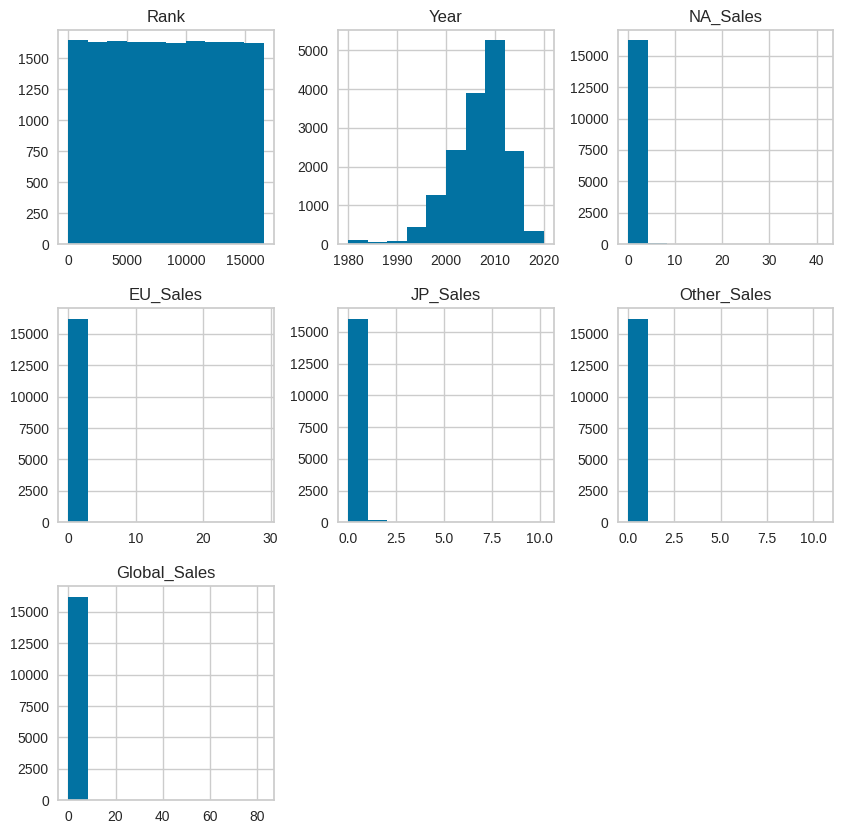

In [8]:
df.hist(figsize=(10, 10))
plt.show()

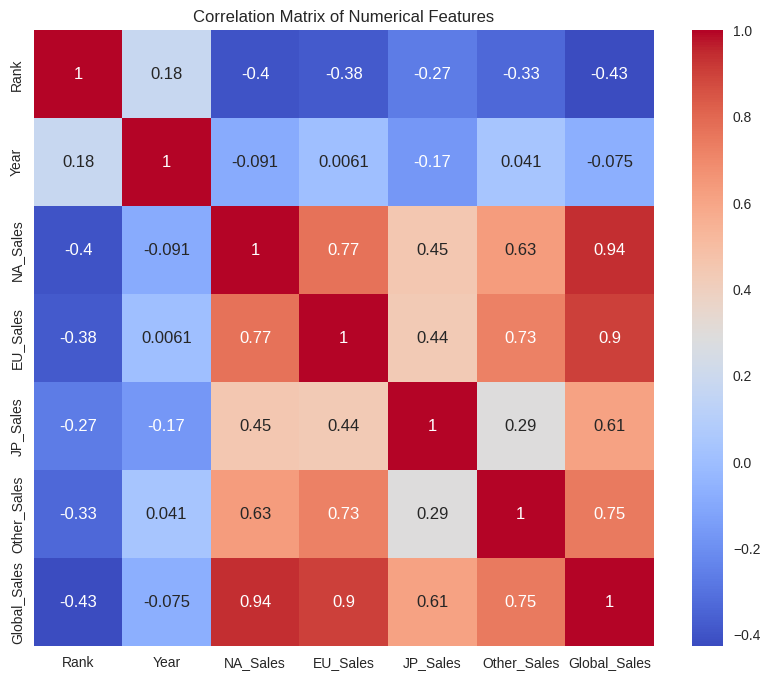

In [9]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


In [11]:
df_clean = df.drop(['Rank','Name', 'Year', 'Platform', 'Publisher'], axis=1)

In [12]:
label_encoder_1 = LabelEncoder()
df_labeled = df_clean.copy()

df_labeled['Genre'] = label_encoder_1.fit_transform(df_clean['Genre'])
df_labeled.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10,41.49,29.02,3.77,8.46,82.74
1,4,29.08,3.58,6.81,0.77,40.24
2,6,15.85,12.88,3.79,3.31,35.82
3,10,15.75,11.01,3.28,2.96,33.00
4,7,11.27,8.89,10.22,1.00,31.37


In [13]:
features_to_scale = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
scaler = StandardScaler()
df_labeled[features_to_scale] = scaler.fit_transform(df_labeled[features_to_scale])
df_labeled.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10,50.126469,56.691515,11.835597,44.253501,52.446423
1,4,35.036615,6.739357,21.583251,3.796218,25.329663
2,6,18.949687,25.000169,11.899727,17.159222,22.509520
3,10,18.828093,21.328372,10.264430,15.317863,20.710243
4,7,13.380668,17.165692,32.517296,5.006254,19.670236


In [14]:
print(df_labeled.isnull().sum())

Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

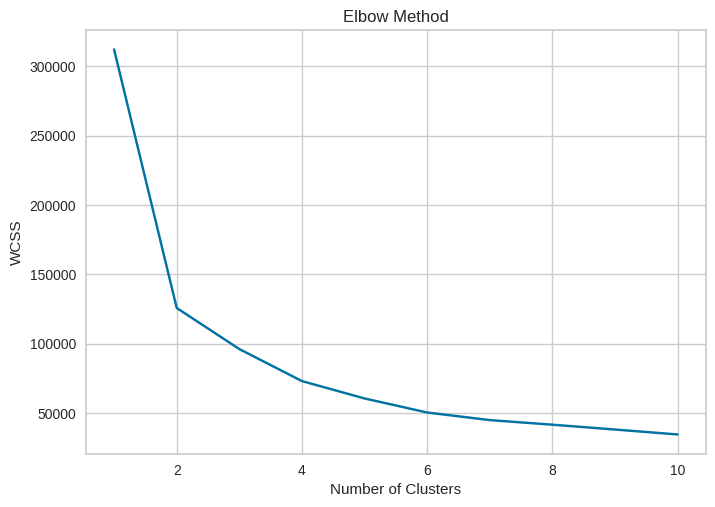

In [15]:
# Menentukan jumlah cluster optimal dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans_wcss = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_wcss.fit(df_labeled)
    wcss.append(kmeans_wcss.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

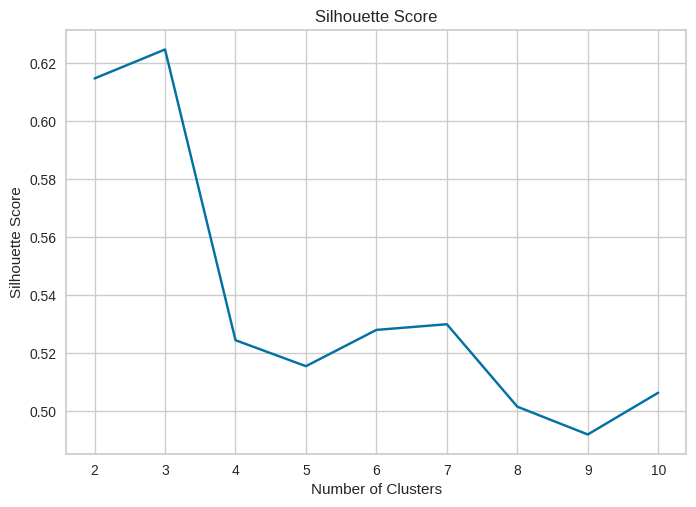

In [16]:
# Menggunakan Silhouette Score untuk mengevaluasi kualitas cluster
silhouette_scores = []
for i in range(2, 11):
    kmeans_silhouette = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_silhouette.fit(df_labeled)
    silhouette_scores.append(silhouette_score(df_labeled, kmeans_silhouette.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, random_state=30)
kmeans.fit(df_labeled)

KMeans(n_clusters=3, random_state=30)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [18]:
silhouette_avg = silhouette_score(df_labeled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5102197560264825


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


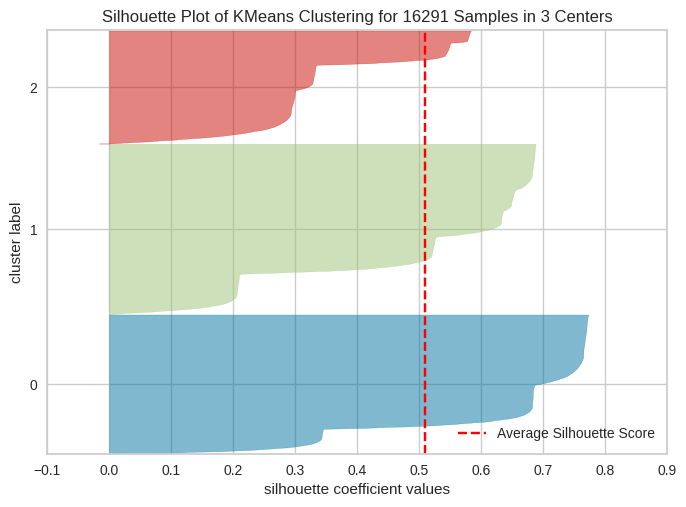

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 16291 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_labeled)
visualizer.show()

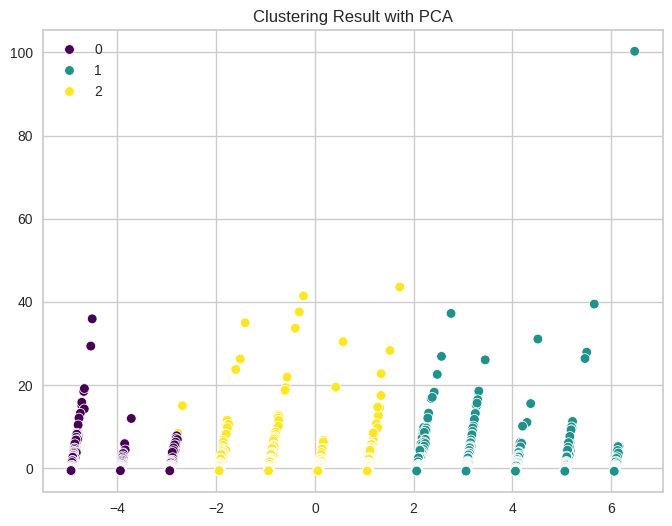

In [21]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_labeled)
kmeans_labels = kmeans.fit_predict(df_labeled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('Clustering Result with PCA')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [22]:
# Tambahkan Hasil Label Cluster ke DataFrame
df_labeled['Cluster'] = kmeans.labels_
df_labeled.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
0,10,50.126469,56.691515,11.835597,44.253501,52.446423,1
1,4,35.036615,6.739357,21.583251,3.796218,25.329663,2
2,6,18.949687,25.000169,11.899727,17.159222,22.509520,2
3,10,18.828093,21.328372,10.264430,15.317863,20.710243,1
4,7,13.380668,17.165692,32.517296,5.006254,19.670236,1


In [23]:
# Ubah kembali data numerik menjadi semula
df_labeled['Genre'] = label_encoder_1.inverse_transform(df_labeled['Genre'])
df_labeled.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
0,Sports,50.126469,56.691515,11.835597,44.253501,52.446423,1
1,Platform,35.036615,6.739357,21.583251,3.796218,25.329663,2
2,Racing,18.949687,25.000169,11.899727,17.159222,22.509520,2
3,Sports,18.828093,21.328372,10.264430,15.317863,20.710243,1
4,Role-Playing,13.380668,17.165692,32.517296,5.006254,19.670236,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [24]:
df_labeled[features_to_scale] = scaler.inverse_transform(df_labeled[features_to_scale])
df_labeled.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
0,Sports,41.49,29.02,3.77,8.46,82.74,1
1,Platform,29.08,3.58,6.81,0.77,40.24,2
2,Racing,15.85,12.88,3.79,3.31,35.82,2
3,Sports,15.75,11.01,3.28,2.96,33.00,1
4,Role-Playing,11.27,8.89,10.22,1.00,31.37,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [25]:
for cluster_label in df_labeled['Cluster'].unique():
    cluster_data = df_labeled[df_labeled['Cluster'] == cluster_label]
    print(f"\nKarakteristik Cluster {cluster_label}:")
    print(cluster_data.describe())  # Statistik deskriptif
    # Analisis lebih lanjut dapat dilakukan pada kolom spesifik, misal:
    print(f"Rata-rata Global Sales di cluster {cluster_label}: {cluster_data['Global_Sales'].mean()}")
    print(f"Total Global Sales di cluster {cluster_label}: {cluster_data['Global_Sales'].sum()}")


Karakteristik Cluster 1:
          NA_Sales     EU_Sales     JP_Sales   Other_Sales  Global_Sales  \
count  6574.000000  6574.000000  6574.000000  6.574000e+03   6574.000000   
mean      0.277055     0.156255     0.096725  5.118953e-02      0.581460   
std       0.905703     0.607738     0.368448  1.867560e-01      1.762142   
min       0.000000     0.000000     0.000000  6.938894e-18      0.010000   
25%       0.000000     0.000000     0.000000  6.938894e-18      0.070000   
50%       0.080000     0.020000     0.000000  1.000000e-02      0.190000   
75%       0.250000     0.110000     0.050000  4.000000e-02      0.530000   
max      41.490000    29.020000    10.220000  8.460000e+00     82.740000   

       Cluster  
count   6574.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0  
Rata-rata Global Sales di cluster 1: 0.5814602981442045
Total Global Sales di cluster 1: 3822.5200000000004

Karakteristik Cluster 2:
  

Cluster
1    6574
0    5359
2    4358
Name: count, dtype: int64 



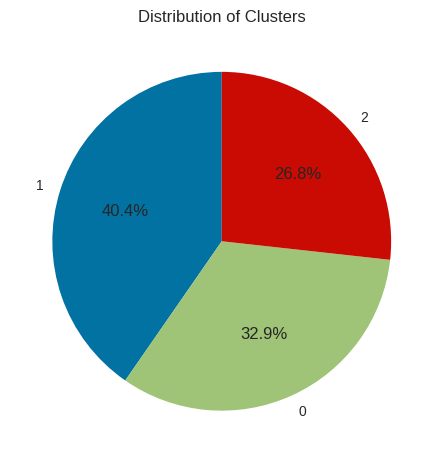

In [26]:
# Hitung jumlah data per kluster
cluster_count = df_labeled['Cluster'].value_counts()
print(cluster_count,'\n')

# Visualisasi
plt.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters')
plt.show()

Genre    Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Cluster                                                                
0          3251       1274       834     0         0       0       0   
1             0          0         0     0         0       0       0   
2             0          0         2  1686       875     570    1225   

Genre    Role-Playing  Shooter  Simulation  Sports  Strategy  
Cluster                                                       
0                   0        0           0       0         0  
1                1470     1282         848    2304       670  
2                   0        0           0       0         0   



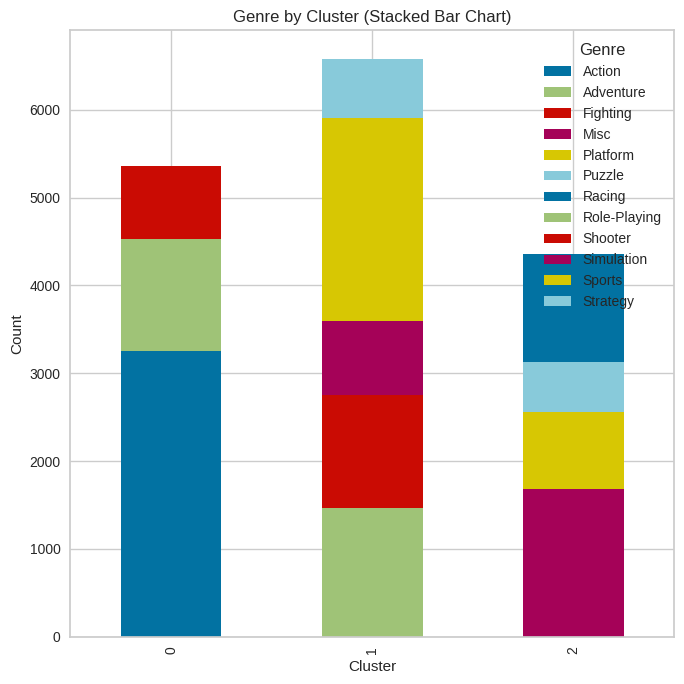

In [27]:
# Grup berdasarkan 'Cluster' dan 'Genre' dan hitung kemunculan datanya
genre_and_cluster_counts = df_labeled.groupby(['Cluster', 'Genre']).size().unstack(fill_value=0)
print(genre_and_cluster_counts,'\n')

# Plot dengan bar chart
genre_and_cluster_counts.plot(kind='bar', stacked=True, figsize=(7, 7))
plt.title('Genre by Cluster (Stacked Bar Chart)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0:

  Cluster ini terdiri dari Video Game dengan :
  *   Rata-Rata NA_Sales: 0.219155
  *   Rata-Rata EU_Sales: 0.126191
  *   Rata-Rata JP_Sales: 0.05462
  *   Rata-Rata Other_Sales: 0.04410524
  *   Rata-Rata Global_Sales: 0.444297

  Total Game : 5359
  Total Global Sales di cluster 0: 2380.9900000000002

  Analisis:
  * Cluster ini mencakup video game yang penjualan terendah secara global dan mendapatkan penjualan tertinggi di Amerika Utara dan penjualan terendah di lain - lain.
  * Dengan Total Game : 5359 dan Total Global Sales : 2380 maka dapat disimpulkan game yang terjual sekitar 44.4297% terjual dan 55.5703% tidak terjual.
  
  Insight : Dilihat dari genre video game yaitu Action, Adventure, Fighting. Maka dapat disimpulkan jika genre video game Action, Adventure, Fighting laku di Amerika Utara tapi terendah secara global.

2. Cluster 1:

  Cluster ini terdiri dari Video Game dengan :
  *   Rata-Rata NA_Sales: 0.277055
  *   Rata-Rata EU_Sales: 0.156255
  *   Rata-Rata JP_Sales: 0.096725
  *   Rata-Rata Other_Sales: 0.05118953
  *   Rata-Rata Global_Sales: 0.581460

  Total Game : 6574
  Total Global Sales di cluster 1: 3822.5200000000004

  Analisis:
  * Cluster ini mencakup video game yang penjualan tertinggi secara global dan mendapatkan penjualan tertinggi di Amerika Utara dan penjualan terendah di lain - lain.
  * Dengan Total Game : 6574 dan Total Global Sales : 3822 maka dapat disimpulkan game yang terjual sekitar 58.1460% terjual dan 41.854% tidak terjual.

  Insight : Dilihat dari genre video game yaitu Role-Playing, Shooter, Simulation, Sports, Strategy. Maka dapat disimpulkan jika genre video game Role-Playing, Shooter, Simulation, Sports, Strategy laku di Amerika Utara tapi tidak diminati secara global.

3. Cluster 2:

  Cluster ini terdiri dari Video Game dengan :
  *   Rata-Rata NA_Sales: 0.305608
  *   Rata-Rata EU_Sales: 0.161361
  *   Rata-Rata JP_Sales: 0.081618
  *   Rata-Rata Other_Sales: 0.04957090
  *   Rata-Rata Global_Sales: 0.598545

  Total Game: 4358
  Total Global Sales di cluster 2: 2608.46

  Analisis:
  * Cluster ini mencakup video game yang penjualan menengah secara global dan mendapatkan penjualan tertinggi di Amerika Utara dan penjualan terendah di Jepang.
  * Dengan Total Game : 4358 dan Total Global Sales : 2608.46 maka dapat disimpulkan game yang terjual sekitar 59.8545% terjual dan 40.1455% tidak terjual.

  Insight : Dilihat dari genre video game yaitu Misc, Platform, Puzzle, Racing. Maka dapat disimpulkan jika genre video game Misc, Platform, Puzzle, Racing laku di Amerika dan diminati secara global.

  Kesimpulan :
  * Region Amerika Utara merupakan region dengan penjualan video game tertinggi secara global
  * Genre video game Role-Playing, Shooter, Simulation, Sports, Strategy merupakan genre video game terlaku di Amerika Utara dan global.
  * Cluster ke 2 dengan genre video game Misc, Platform, Puzzle, Racing dan region Amerika Utara mempunyai tingkat game terjual tertinggi sebesar 59.8545% terjual dan 40.1455% tidak terjual.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [28]:
df_labeled.to_csv('/content/drive/MyDrive/Colab Notebooks/Clasification Klustering Dicoding/clustered_data.csv', index=False)